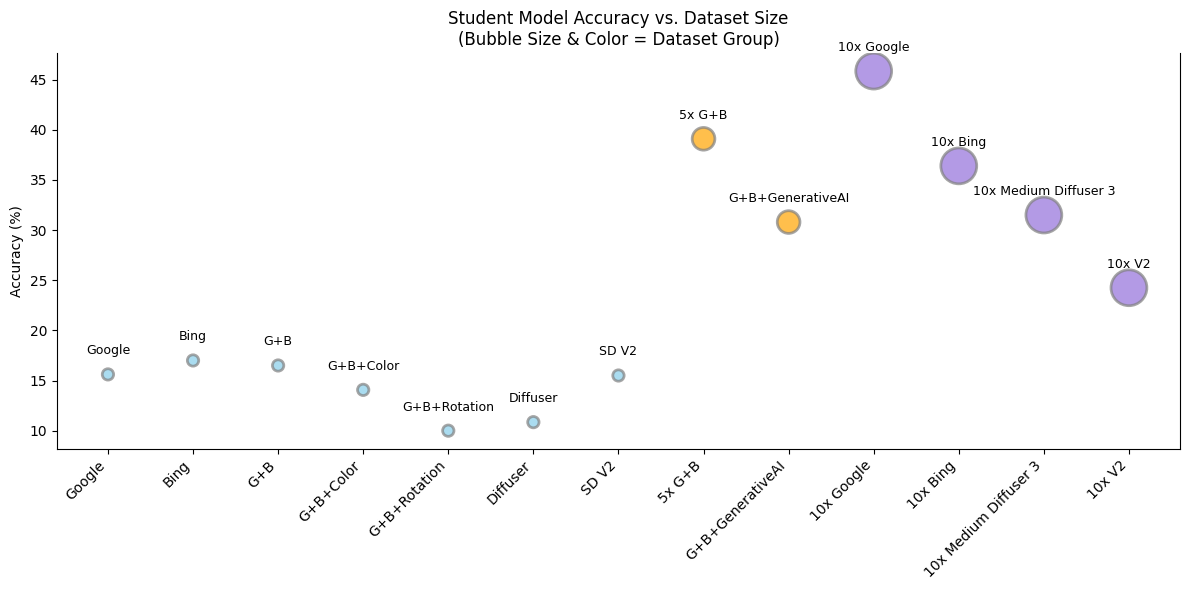

In [1]:
import matplotlib.pyplot as plt

# Experiment labels
experiments = [
    "Google", "Bing", "G+B", "G+B+Color", "G+B+Rotation",
    "Diffuser", "SD V2", "5x G+B", "G+B+GenerativeAI",
    "10x Google", "10x Bing", "10x Medium Diffuser 3", "10x V2"
]

accuracy = [15.61, 17.0, 16.5, 14.07, 10.0, 10.85, 15.5, 39.1, 30.8, 45.85, 36.4, 31.5, 24.25]
dataset_size = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 4000, 4000, 10000, 10000, 10000, 10000]

# X-axis positions
x = list(range(len(experiments)))
sizes = [s / 15 for s in dataset_size]

# Assign colors by dataset group
colors = []
for size in dataset_size:
    if size <= 1000:
        colors.append('skyblue')        # Small
    elif size <= 4000:
        colors.append('orange')         # 5x
    else:
        colors.append('mediumpurple')   # 10x

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(x, accuracy, s=sizes, c=colors, alpha=0.7, edgecolors='gray', linewidth=2)

# Text labels
for i, label in enumerate(experiments):
    plt.text(x[i], accuracy[i] + 2, label, ha='center', fontsize=9)

# Axes and title
plt.xticks(x, experiments, rotation=45, ha='right')
plt.ylabel("Accuracy (%)")
plt.title("Student Model Accuracy vs. Dataset Size\n(Bubble Size & Color = Dataset Group)")
plt.grid(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


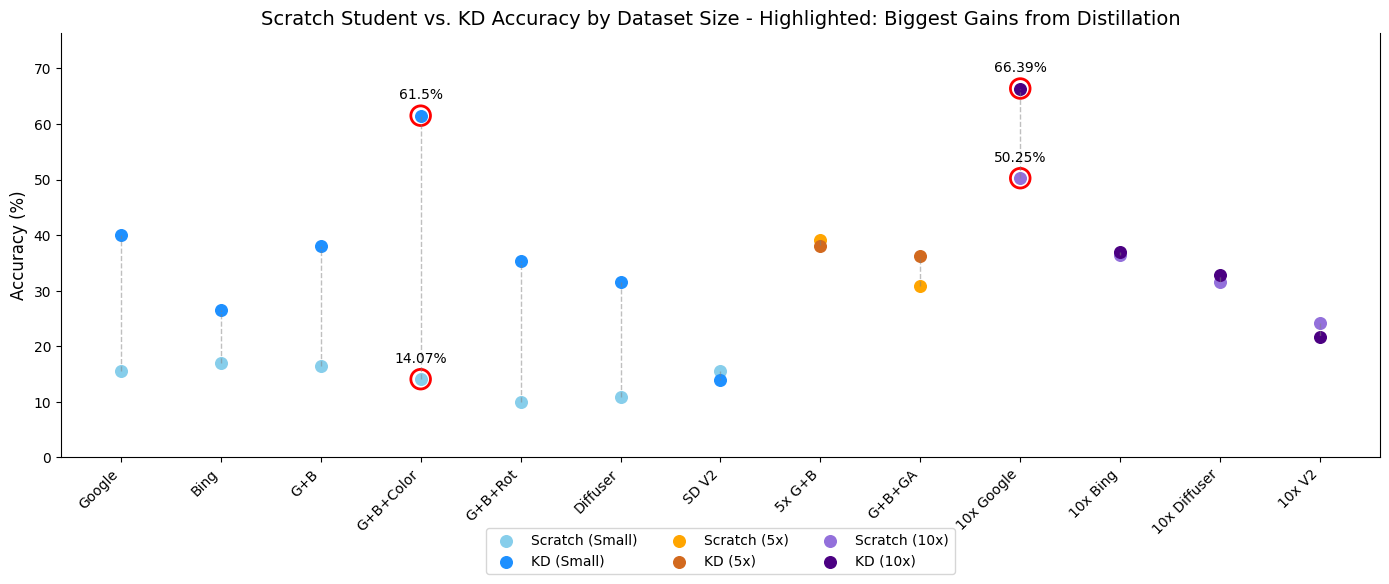

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Experiments
experiments = [
    "Google", "Bing", "G+B", "G+B+Color", "G+B+Rot",
    "Diffuser", "SD V2", "5x G+B", "G+B+GA",
    "10x Google", "10x Bing", "10x Diffuser", "10x V2"
]

# Accuracy values
scratch_acc = [15.61, 17.0, 16.5, 14.07, 10.0, 10.85, 15.5, 39.1, 30.8, 50.25, 36.4, 31.5, 24.25]

kd_acc =      [40.0, 26.5, 38.0, 61.5, 35.4, 31.53, 14.0, 38.1, 36.19, 66.39, 36.9, 32.9, 21.6]

# X-axis positions
x = np.arange(len(experiments))

# Dataset groupings
small_idx = [0, 1, 2, 3, 4, 5, 6]
mid_idx = [7, 8]
large_idx = [9, 10, 11, 12]

# Indices with largest KD - scratch gap
highlight_idx = [3, 9]  # G+B+Color and 10x Google

plt.figure(figsize=(14, 6))

# Scatter: small
plt.scatter(x[small_idx], [scratch_acc[i] for i in small_idx], color='skyblue', label='Scratch (Small)', s=70)
plt.scatter(x[small_idx], [kd_acc[i] for i in small_idx], color='dodgerblue', label='KD (Small)', s=70)

# Scatter: 5x
plt.scatter(x[mid_idx], [scratch_acc[i] for i in mid_idx], color='orange', label='Scratch (5x)', s=70)
plt.scatter(x[mid_idx], [kd_acc[i] for i in mid_idx], color='chocolate', label='KD (5x)', s=70)

# Scatter: 10x
plt.scatter(x[large_idx], [scratch_acc[i] for i in large_idx], color='mediumpurple', label='Scratch (10x)', s=70)
plt.scatter(x[large_idx], [kd_acc[i] for i in large_idx], color='indigo', label='KD (10x)', s=70)

# Connect scratch ↔ KD
for i in range(len(x)):
    plt.plot([x[i], x[i]], [scratch_acc[i], kd_acc[i]], color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Highlight largest gaps
for i in highlight_idx:
    plt.scatter(x[i], kd_acc[i], s=200, edgecolors='red', facecolors='none', linewidths=2, label='_nolegend_')
   
    plt.scatter(x[i], scratch_acc[i], s=200, edgecolors='red', facecolors='none', linewidths=2, label='_nolegend_')
    plt.text(x[i], kd_acc[i] + 3, f"{kd_acc[i]}%", ha='center', fontsize=10, color='black')
    plt.text(x[i], scratch_acc[i] + 3, f"{scratch_acc[i]}%", ha='center', fontsize=10, color='black')


# Labels & legend
plt.xticks(x, experiments, rotation=45, ha='right', fontsize=10)

plt.ylabel("Accuracy (%)", fontsize=12)

plt.title("Scratch Student vs. KD Accuracy by Dataset Size - Highlighted: Biggest Gains from Distillation", fontsize=14)

# Legend at bottom center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.ylim(0, max(kd_acc) + 10)

plt.gca().spines['top'].set_visible(False)


plt.grid(False)

plt.tight_layout()

plt.savefig("scratch_vs_kd_accuracy.png", dpi=1000, bbox_inches='tight')

plt.show()
